In [6]:
import pandas as pd

In [8]:
years = range(2015, 2024)
sub_data = []
for year in years:
    sub_data.append(pd.read_csv(f'itbi_{year}.csv', sep=';'))
data = pd.concat(sub_data)


In [12]:
data_2023 = data[data['ano'] == 2023]

In [30]:
data_2023['tipo_construcao'].unique()
filtro_casa_apartamento_bom = ((data_2023['tipo_construcao'] == 'Casa') | (data_2023['tipo_construcao'].str.contains('Apartamento'))) \
                                & (data_2023['estado_conservacao'] == 'Bom')
data_2023_casa_apartamento_bom = data_2023[filtro_casa_apartamento_bom]
len(data_2023_casa_apartamento_bom)/len(data_2023)

0.13499013806706114


tipo_ocupa
COMERCIAL COM LIXO ORGANICO    0.526008
COMERCIAL SEM LIXO ORGANICO    0.461134
RESIDENCIAL                    0.012858
Name: proportion, dtype: float64

tipo_ocupa
RESIDENCIAL                    0.968442
COMERCIAL COM LIXO ORGANICO    0.026997
COMERCIAL SEM LIXO ORGANICO    0.004560
Name: proportion, dtype: float64

<Axes: xlabel='tipo_ocupa'>

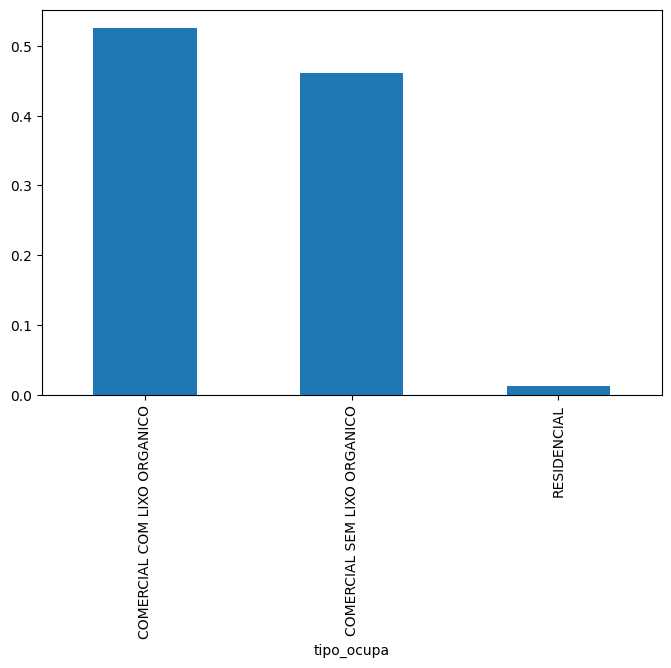

In [58]:
# juntar casas e apartamentos, subtrair do dataset total
filtro_residencial = ((data_2023['tipo_construcao'] == 'Casa') | (data_2023['tipo_construcao'].str.contains('Apartamento')))
data_nao_residencial = data_2023[~filtro_residencial]
print(len(data_nao_residencial)/len(data_2023))
display(data_nao_residencial.value_counts('tipo_ocupa', normalize=True))
display(data_2023[filtro_residencial].value_counts('tipo_ocupa', normalize=True))
data_nao_residencial.value_counts('tipo_ocupa', normalize=True).plot(kind='bar', figsize=(8,5))

In [74]:
data_2023['fracao_ideal'] = data_2023['fracao_ideal'].str.replace(',', '.').astype(float) #.describe(percentiles=[0.8, 0.85, 0.9]) #['padrao_acabamento'].value_counts(normalize=True)

C:\Users\jubi\AppData\Local\Temp\ipykernel_26980\2220312584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['fracao_ideal'] = data_2023['fracao_ideal'].str.replace(',', '.').astype(float) #.describe(percentiles=[0.8, 0.85, 0.9]) #['padrao_acabamento'].value_counts(normalize=True)


In [76]:
data_2023['numero_de_proprietarios'] = 1/data_2023['fracao_ideal']

C:\Users\jubi\AppData\Local\Temp\ipykernel_26980\1736048405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['numero_de_proprietarios'] = 1/data_2023['fracao_ideal']


In [85]:
data_2023['valor_categ_cut'] = pd.qcut(data_2023['valor_avaliacao'], q=[0, 0.1, 0.5, 0.9, 1], labels=['muito barato', 'abaixo da mediana', 'acima da mediana', 'caro pa mizera'])
data_2023['valor_categ'] = pd.cut(data_2023['valor_avaliacao'], 4, labels=['muito barato', 'abaixo da mediana', 'acima da mediana', 'caro pa mizera'])

C:\Users\jubi\AppData\Local\Temp\ipykernel_26980\3655095283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['valor_categ_cut'] = pd.qcut(data_2023['valor_avaliacao'], q=[0, 0.1, 0.5, 0.9, 1], labels=['muito barato', 'abaixo da mediana', 'acima da mediana', 'caro pa mizera'])
C:\Users\jubi\AppData\Local\Temp\ipykernel_26980\3655095283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['valor_categ'] = pd.cut(data_2023['valor_avaliacao'], 4, labels=['muito barato', 'abaixo da mediana'

In [87]:
data_2023['valor_categ_cut'].value_counts(normalize=True)

valor_categ_cut
acima da mediana     0.399921
abaixo da mediana    0.396765
muito barato         0.103274
caro pa mizera       0.100039
Name: proportion, dtype: float64

In [91]:
bairro_valor = data_2023.groupby('bairro').agg(valor_total = ('valor_avaliacao', 'sum'))

In [94]:
bairro_valor = bairro_valor.sort_values('valor_total')
bairro_valor['valor_soma'] = bairro_valor['valor_total'].cumsum()

In [95]:
bairro_valor

,valor_total,valor_soma
bairro,,
MANGUEIRA,1.600000e+05,1.600000e+05
COQUEIRAL,2.739023e+05,4.339023e+05
ALTO JOSE BONIFACIO,2.975930e+05,7.314953e+05
MORRO DA CONCEICAO,4.120000e+05,1.143495e+06
BREJO DE BEBERIBE,4.200000e+05,1.563495e+06
...,...,...
GRACAS,2.915819e+08,4.289287e+09
MADALENA,2.958429e+08,4.585130e+09
IMBIRIBEIRA,6.997826e+08,5.284913e+09


In [ ]:
import numpy as np
import matplotlib
# Corte em 70000 no valor da avaliação
((data[data['valor_avaliacao'] < 500000]['valor_avaliacao']/10000).round()*10000).value_counts().reset_index().sort_values(by='valor_avaliacao').set_index('valor_avaliacao').plot()

In [118]:
data = data[data['valor_avaliacao'] >70000]


In [126]:
ano_evol = data.groupby(['ano']).agg({'valor_avaliacao': ['sum', 'mean', 'median', 'count', 'max', 'min']})

In [127]:
import plotly.express as px
px.box(data, x='ano', y='valor_avaliacao', log_y=True)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'ano=%{x}<br>valor_avaliacao=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x': array([2015, 2015, 2015, ..., 2023, 2023, 2023], dtype=int64),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([750000., 295000., 290000., ..., 285000., 389000., 374000.]),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'ano'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'valor_avaliacao'}, 'type': 'log'}}
})